# Matplotlib Extension

In this extension, we use a custom library to import weather data for 3 Colorado locations from the web and then plot some scatter plots and box plots.

Run the code below to import some weather data using the meteostat library. You may want to refer to the [Meteostat Python Library Guide](https://dev.meteostat.net/python).

**Note**: by default, meteostat units are metric, so km/h for windspeed, deg C for temp, millibars for pressure, etc.

**Note**: If you are using Colab or Anaconda, you will need to install the meteostat library using `!pip install meteostat`.

In [1]:
from datetime import date
import meteostat as ms, numpy as np, pandas as pd

# Set display options for numpy
np.set_printoptions(floatmode='fixed', precision=1)

# Set start and end date for data
start = date(2025, 1, 1)
end = date(2025, 12, 31)

# Select Station(s)
denver_stn = ms.stations.meta(72469)
alamosa_stn = ms.stations.meta(72462)
lamar_stn = ms.stations.meta('KLAA0')

#Get data
denver_data = ms.daily(denver_stn, start, end)
alamosa_data = ms.daily(alamosa_stn, start, end)
lamar_data = ms.daily(lamar_stn, start, end)

In [2]:
# Store Alamosa data in pandas dataframe
alamosa = alamosa_data.fetch()
alamosa

,temp,tmin,tmax,rhum,prcp,snwd,wspd,wpgt,pres,tsun,cldc
time,,,,,,,,,,,
2025-01-01,-7.8,-17.1,2.2,63,0.0,0,4.7,<NA>,1026.2,<NA>,0
2025-01-02,-5.8,-14.9,9.4,59,0.0,0,6.8,<NA>,1029.2,<NA>,0
2025-01-03,-4.2,-14.3,9.4,63,0.0,0,4.7,<NA>,1028.6,<NA>,0
2025-01-04,-1.7,-12.1,10.0,53,0.0,0,19.8,<NA>,1013.0,<NA>,2
2025-01-05,-3.3,-13.2,4.4,52,0.0,0,11.9,<NA>,1019.6,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,3.4,-3.9,11.1,68,0.0,0,19.8,<NA>,1013.0,<NA>,5
2025-12-28,-3.7,-14.4,3.3,50,0.0,0,15.2,<NA>,1020.2,<NA>,1
2025-12-29,-7.4,-17.8,4.4,50,0.0,0,4.2,<NA>,1031.1,<NA>,0


In [3]:
# Store Denver data in pandas dataframe
denver = denver_data.fetch()
denver

,temp,tmin,tmax,rhum,prcp,snwd,wspd,wpgt,pres,tsun,cldc
time,,,,,,,,,,,
2025-01-01,-3.5,-7.8,1.5,56,0.0,<NA>,9.2,<NA>,1021.7,<NA>,5
2025-01-02,-0.0,-6.1,6.7,58,0.0,<NA>,12.7,<NA>,1021.9,<NA>,6
2025-01-03,0.6,-5.1,7.8,56,0.0,<NA>,12.7,<NA>,1021.4,<NA>,6
2025-01-04,-3.4,-6.8,-0.5,76,0.0,<NA>,16.7,<NA>,1013.9,<NA>,8
2025-01-05,-6.6,-9.3,-3.3,77,0.0,<NA>,14.1,<NA>,1023.9,<NA>,6
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,6.6,2.8,12.1,41,<NA>,<NA>,12.1,<NA>,1006.1,<NA>,7
2025-12-28,-3.0,-6.6,2.0,51,<NA>,<NA>,20.4,<NA>,1023.2,<NA>,4
2025-12-29,-3.0,-9.5,4.4,41,<NA>,<NA>,8.2,<NA>,1032.7,<NA>,0


In [4]:
# Store Lamar data in pandas dataframe
lamar = lamar_data.fetch()
lamar

,temp,tmin,tmax,rhum,prcp,snwd,wspd,wpgt,pres,tsun,cldc
time,,,,,,,,,,,
2025-01-01,-0.2,-7.8,7.8,65,0.0,<NA>,11.0,<NA>,1022.5,<NA>,2
2025-01-02,-1.9,-10.6,11.1,69,0.0,<NA>,9.9,<NA>,1023.9,<NA>,0
2025-01-03,-0.9,-8.9,12.2,73,0.0,<NA>,11.0,<NA>,1023.8,<NA>,1
2025-01-04,-3.8,-7.8,-2.2,96,<NA>,<NA>,19.3,<NA>,1015.3,<NA>,8
2025-01-05,-9.0,-15.0,-5.0,79,<NA>,<NA>,18.6,<NA>,1026.0,<NA>,4
...,...,...,...,...,...,...,...,...,...,...,...
2025-12-27,10.2,-2.0,21.0,44,0.0,<NA>,11.8,<NA>,1006.1,<NA>,5
2025-12-28,-3.4,-12.0,5.0,72,0.1,<NA>,14.8,<NA>,1022.0,<NA>,2
2025-12-29,-5.5,-16.0,6.0,68,0.0,<NA>,8.4,<NA>,1032.0,<NA>,0


## Part 1: Scatter Plots

A scatter plot allows you to plot many pairs of (x, y) points on the same axes. This gives you a way to see what relationship there may be between x and y values.

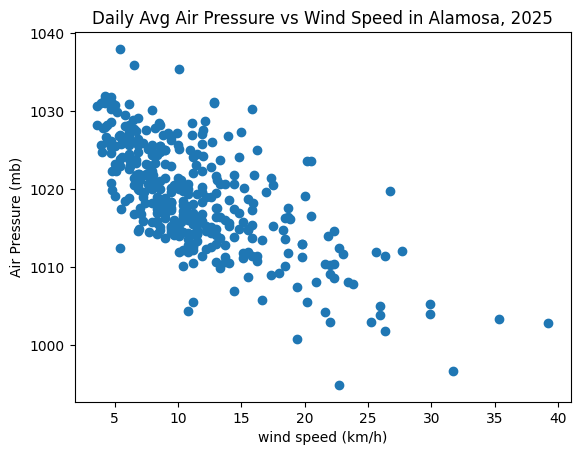

In [5]:
# Create a scatter plot of windspeed vs air pressure for Alamosa
import matplotlib.pyplot as plt
x1 = alamosa['wspd']
y1 = alamosa['pres']
plt.xlabel('wind speed (km/h)')
plt.ylabel('Air Pressure (mb)')
plt.title('Daily Avg Air Pressure vs Wind Speed in Alamosa, 2025')
plt.scatter(x1, y1)
plt.show()

### Task 1

Now create separate scatter plots of windspeed versus air presure for Denver and Lamar. Do they follow the same pattern? What relationship is there, broadly speaking, between windspeed and air pressure for these three Colorado locations?

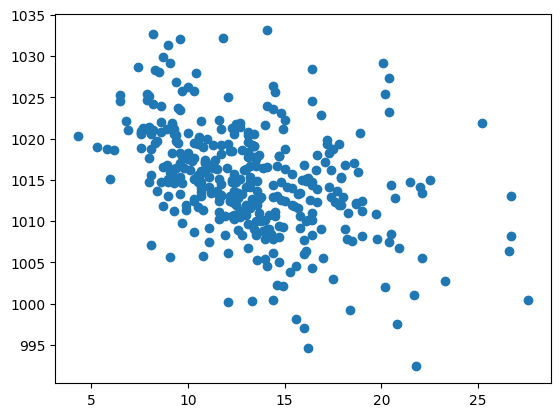

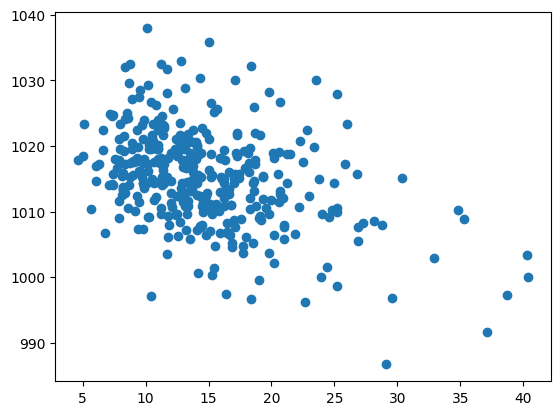

In [6]:
# Create a scatter plot of windspeed vs air pressure for Denver
import matplotlib.pyplot as plt
x2 = denver['wspd']
y2 = denver['pres']
plt.scatter(x2, y2)
plt.show()

# Create a scatter plot of windspeed vs air pressure for Lamar
import matplotlib.pyplot as plt
x3 = lamar['wspd']
y3 = lamar['pres']
plt.scatter(x3, y3)
plt.show()

### Task 2

Now plot all 3 scatter plots on the same axes. You will need to include each `plt.scatter()` instruction in the same code cell before you run `plt.show()`.

Add axis labels and a title to your graph.

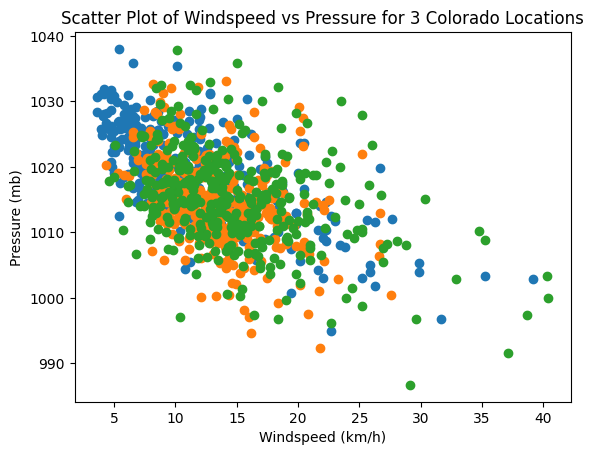

In [7]:
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.scatter(x3, y3)
plt.xlabel("Windspeed (km/h)")
plt.ylabel("Pressure (mb)")
plt.title("Scatter Plot of Windspeed vs Pressure for 3 Colorado Locations")
plt.show()

## Box plots

Box plots give you an overall sense of the distribution of data. The box plot typically shows:

- Median and upper and lower quartiles
- Max and min values; or
- 'outliers' if the data are very spread out

We will create a box plot of average daily temperature for each location. You can learn more about box plots here: https://en.wikipedia.org/wiki/Box_plot

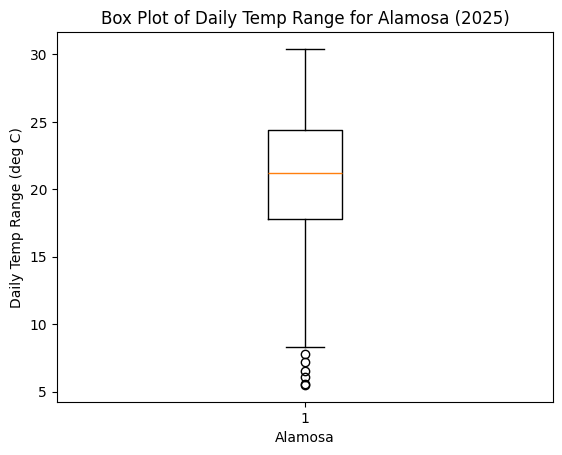

In [8]:
# Create a box plot for the daily temperature range in Alamosa for 2025
al_trange = alamosa['tmax'] - alamosa['tmin']
plt.xlabel("Alamosa")
plt.ylabel("Daily Temp Range (deg C)")
plt.title("Box Plot of Daily Temp Range for Alamosa (2025)")
plt.boxplot(al_trange)
plt.show()

### Task 3

Create two more box plots of daily temperature range, one for Denver and one for Lamar.

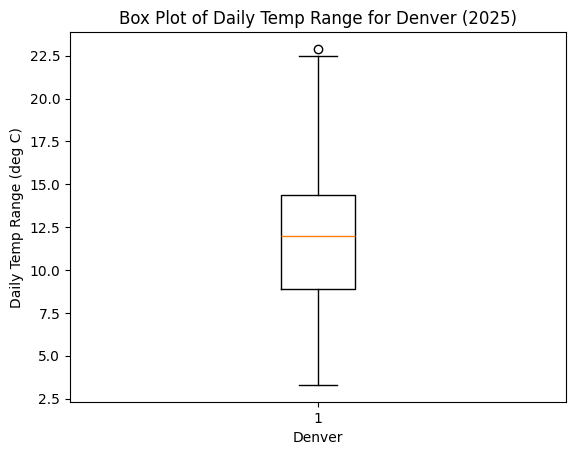

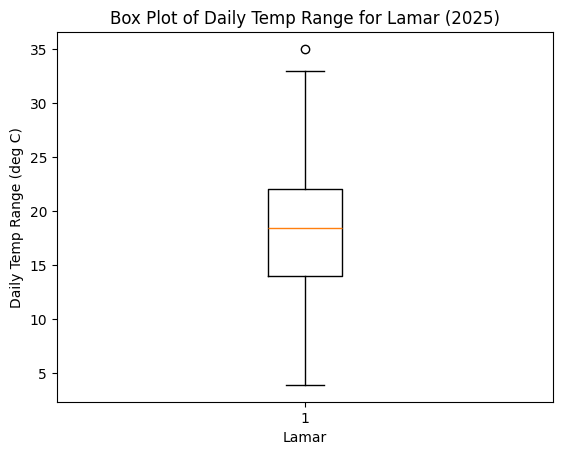

In [9]:
# Type your code here

# Create a box plot for the daily temperature range in Denver for 2025
den_trange = denver['tmax'] - denver['tmin']
plt.xlabel("Denver")
plt.ylabel("Daily Temp Range (deg C)")
plt.title("Box Plot of Daily Temp Range for Denver (2025)")
plt.boxplot(den_trange)
plt.show()

# Create a box plot for the daily temperature range in Lamar for 2025
lam_trange = lamar['tmax'] - lamar['tmin']
plt.xlabel("Lamar")
plt.ylabel("Daily Temp Range (deg C)")
plt.title("Box Plot of Daily Temp Range for Lamar (2025)")
plt.boxplot(lam_trange)
plt.show()

### Task 4

Now put all three box plots on the same axes and label the plot appropriately.

Hint: to put several box plots on one set of axes, put the data in a list `\[data1, data2, data3\]` and then use the boxplot method as before with the list as the argument:
```
plt.boxplot([data1, data2, data3])
```

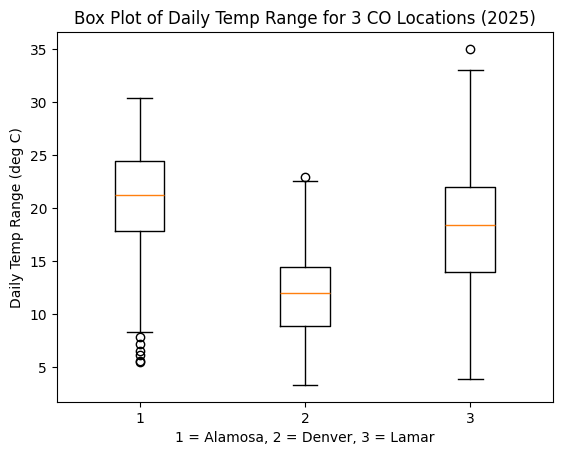

In [10]:
# Create a combined plot for the daily temperature range for all three locations
lam_trange = lamar['tmax'] - lamar['tmin']
plt.xlabel("1 = Alamosa, 2 = Denver, 3 = Lamar")
plt.ylabel("Daily Temp Range (deg C)")
plt.title("Box Plot of Daily Temp Range for 3 CO Locations (2025)")
plt.boxplot([al_trange, den_trange, lam_trange])
plt.show()

### Task 5

Choose another location in Colorado and use the meteostat library to get daily weather data from that location. Use the data to produce similar graphs for that location. What do the graphs tell you about differences between the locations?